What this task is asking is if we have light at 256 values of intensity, but we only have 2^k bits to store these 256 values at, for which k will we observe false countouring? 
False contouring can be seen as obvious changes in color/intensity transitions. According to the task, an abrubt change in at least 8 intensity values can be seen by humans. 
For 
k = 1 -> 2 unique values
k = 2 -> 4 unique values
k = 5 -> 32 unique values
k = 6 -> 64 unique values

So for example for k = 6 we can only store 64 unique values out of the 256 we have, meaning each value we store contains a spectrum of 4 intensity values. This means that we can see a jump of 4 intensity values between each unique value, which should not promote false contouring. 
However, for k=5 we have 32 values to store the 256 intensity values, and as such each bit must store a spectrum of 8 intensity values, which causes false contouring. 

Another explanation

We have an image with 255 values, which we can represent by a number of bits. 
To display every discrete instance of light, we can choose 8-bits as this gives us 256 unique values to work with. 
Including "no light", we now have a 1:1 ratio of discrete bit-values and illumination. 
If we now reduce the bits from 8 to 7, we only have 2^7=128 unique values which must strech over 256 values of illumination. 
This means that two values of illumination must share the same digitized representation. 
Reducing the bit from 8 to 6, we now have 2⁶=64 unique values. This means 4 values of intensity must share the same digital representation.
From 8 to 5 bits we get 2⁵ = 32 unique values. This means 8 values of intensity must share the same digital representation
From 8 to 4 bits we get 2⁴ = 16 unique values. This means 16 values of intensity must share the same digital representation

We can represent this as a table 

8-bit: 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20
7-bit: 1 1 2 2 3 3 4 4 5  5  6  6  7  7  8  8  9  9 10 10 
6-bit: 1 1 1 1 2 2 2 2 3  3  3  3  4  4  4  4  5  5  5  5
5-bit: 1 1 1 1 1 1 1 1 2  2  2  2  2  2  2  2  2  3  3  3
4-bit: 1 1 1 1 1 1 1 1 1  1  1  1  1  1  1  1  2  2  2  2 

Given that humans can detect abrubt changes between shades which differes with eight or more in intensity, we expect contouring to occur 
at 5 bits or lower. At 5-bits, we have k= 2⁵ = 32


In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def intensity_function(n_bits):
    '''
    This function computes the intensity equation from Task 4, then reduces the
    digital resolution to n_bits.
    '''

    ## Define the x,y grid
    grid_size = 1000
    grid_range = np.linspace(0,4,grid_size)
    x,y = np.meshgrid(grid_range, grid_range)
    x0 = 2
    y0 = 2

    ## Compute the intensity
    i = 255 * np.exp(-( (x-x0)**2 + (y-y0)**2 ))

    ## Force the intenisty to be an 8-bit integer
    i = np.array(i).astype(np.uint8)

    ## Mask the lowest n_bits to reduce the digital resolution
    bitmask = int("1"*(n_bits) + "0"*(8-n_bits), base=2)
    # print("1"*(n_bits) + "0"*(8-n_bits))
    i = np.bitwise_and(i, bitmask)

    return i

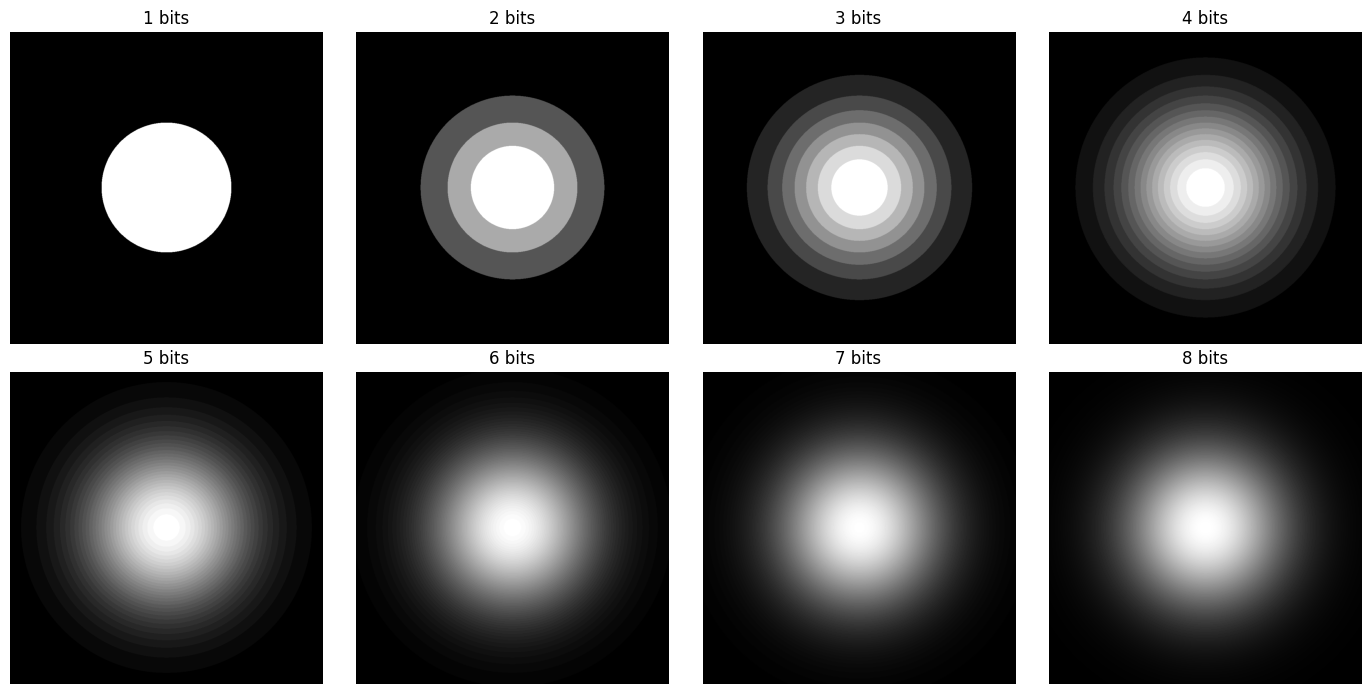

In [3]:
## Initialize a plot to display the options
fig,ax = plt.subplots(2,4, figsize=(14,7))
ax = ax.ravel()

for bit in np.linspace(8,1,8, dtype=int):
    
    img = intensity_function(bit)
    ax[bit-1].imshow(img, cmap='gray')
    ax[bit-1].set_axis_off()
    ax[bit-1].set_title(f"{bit} bits")

plt.tight_layout()
plt.show()
